In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('adwords_exercise.csv')
df

,"Exercise (Aug 1, 2013-Sep 27, 2013)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Day,Campaign,AdGroup,Clicks,Impressions,CTR,Avg. CPC,Cost,Avg. position,Conversions,Cost/conversion,Conversion rate,View-through conv.,Total conv. value
1,05/08/2013,1,100,0,1,0%,0,0,1,0,0,0%,0,0
2,08/08/2013,1,100,1,3,33.33%,0.03,0.03,1,0,0,0%,0,0
3,10/08/2013,1,100,0,4,0%,0,0,1,0,0,0%,0,0
4,14/08/2013,1,100,0,1,0%,0,0,1,0,0,0%,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15830,24/09/2013,#REF!,#REF!,1,22,4.55%,0.33,0.33,1.5,0,0,0%,0,0
15831,25/09/2013,#REF!,#REF!,1,13,7.69%,0.29,0.29,1.1,0,0,0%,0,0
15832,26/09/2013,#REF!,#REF!,0,4,0%,0,0,1,0,0,0%,0,0
15833,24/09/2013,#REF!,#REF!,0,1,0%,0,0,1,0,0,0%,0,0


In [4]:
data = df.copy()

## Cleaning Data
#### Removing unwanted values, reseting index, change values to float, sort index, group by, etc...

In [5]:
data = data.iloc[:5216,:]
data

,"Exercise (Aug 1, 2013-Sep 27, 2013)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Day,Campaign,AdGroup,Clicks,Impressions,CTR,Avg. CPC,Cost,Avg. position,Conversions,Cost/conversion,Conversion rate,View-through conv.,Total conv. value
1,05/08/2013,1,100,0,1,0%,0,0,1,0,0,0%,0,0
2,08/08/2013,1,100,1,3,33.33%,0.03,0.03,1,0,0,0%,0,0
3,10/08/2013,1,100,0,4,0%,0,0,1,0,0,0%,0,0
4,14/08/2013,1,100,0,1,0%,0,0,1,0,0,0%,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5211,25/09/2013,15,536,342,65510,0.52%,0.05,17.29,1,7,2.47,2.05%,5,445
5212,26/09/2013,15,536,213,25635,0.83%,0.04,8.97,1,2,4.48,0.94%,1,104
5213,27/09/2013,15,536,899,111513,0.81%,0.04,39.51,1,2,19.76,0.22%,7,180
5214,20/09/2013,15,537,41,12677,0.32%,0.05,1.88,1.8,0,0,0%,0,0


In [6]:
data.columns = data.iloc[0]
data_2 = data.iloc[1:, [0,1,2,3,4,7,8,9,12,13]]

convert_dict = {"Day": str, "Campaign": str, "AdGroup": str, "Clicks": int, "Impressions": int,
               "Cost": float, "Avg. position": float, "Conversions": int, "View-through conv.": int,
               "Total conv. value": float}

data_2 = data_2.astype(convert_dict)
data_2['Counter'] = 1
data_2.reset_index(drop=True, inplace=True)
data_2.head()

,Day,Campaign,AdGroup,Clicks,Impressions,Cost,Avg. position,Conversions,View-through conv.,Total conv. value,Counter
0,05/08/2013,1,100,0,1,0.00,1.0,0,0,0.0,1
1,08/08/2013,1,100,1,3,0.03,1.0,0,0,0.0,1
2,10/08/2013,1,100,0,4,0.00,1.0,0,0,0.0,1
3,14/08/2013,1,100,0,1,0.00,1.0,0,0,0.0,1
4,18/08/2013,1,100,0,1,0.00,1.0,0,0,0.0,1


In [7]:
data_2["Campaign"] = np.where((data_2["Campaign"] == "1") & 
                              (data_2["AdGroup"] == "493"), "15", data_2["Campaign"])

In [8]:
data_2.sort_values(by=['Campaign','AdGroup','Day'])
data_2

,Day,Campaign,AdGroup,Clicks,Impressions,Cost,Avg. position,Conversions,View-through conv.,Total conv. value,Counter
0,05/08/2013,1,100,0,1,0.00,1.0,0,0,0.0,1
1,08/08/2013,1,100,1,3,0.03,1.0,0,0,0.0,1
2,10/08/2013,1,100,0,4,0.00,1.0,0,0,0.0,1
3,14/08/2013,1,100,0,1,0.00,1.0,0,0,0.0,1
4,18/08/2013,1,100,0,1,0.00,1.0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5210,25/09/2013,15,536,342,65510,17.29,1.0,7,5,445.0,1
5211,26/09/2013,15,536,213,25635,8.97,1.0,2,1,104.0,1
5212,27/09/2013,15,536,899,111513,39.51,1.0,2,7,180.0,1
5213,20/09/2013,15,537,41,12677,1.88,1.8,0,0,0.0,1


In [9]:
data_2["Day"] = pd.to_datetime(data_2["Day"], format="%d/%m/%Y")

In [10]:
Campaign_1_August = data_2.loc[(data_2["Campaign"] == "1") & 
                               (data_2["Day"].dt.strftime('%m-%Y') == '08-2013')]

Campaign_1_September = data_2.loc[(data_2["Campaign"] == "1") & 
                               (data_2["Day"].dt.strftime('%m-%Y') == '09-2013')]

Campaign_3_August = data_2.loc[(data_2["Campaign"] == "3") & 
                               (data_2["Day"].dt.strftime('%m-%Y') == '08-2013')]

Campaign_3_September = data_2.loc[(data_2["Campaign"] == "3") & 
                               (data_2["Day"].dt.strftime('%m-%Y') == '09-2013')]

Campaign_7_August = data_2.loc[(data_2["Campaign"] == "7") & 
                               (data_2["Day"].dt.strftime('%m-%Y') == '08-2013')]

Campaign_7_September = data_2.loc[(data_2["Campaign"] == "7") & 
                               (data_2["Day"].dt.strftime('%m-%Y') == '09-2013')]

Campaign_15_August = data_2.loc[(data_2["Campaign"] == "15") & 
                               (data_2["Day"].dt.strftime('%m-%Y') == '08-2013')]

Campaign_15_September = data_2.loc[(data_2["Campaign"] == "15") & 
                               (data_2["Day"].dt.strftime('%m-%Y') == '09-2013')]

## Correlation matrix

### Function that plots heatmap of important(based on p-values) correlation table

In [11]:
def calculate_pvalues(df):
    from scipy.stats import pearsonr
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            pvalues[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
    return pvalues

def value_to_NaN(df, value, op):
    filtered_values = df
    if op == ">":
        for col in filtered_values.columns:
            filtered_values.loc[filtered_values[col].astype(float) > value, col] = "NaN"
    elif op == "=":
        for col in filtered_values.columns:
            filtered_values.loc[filtered_values[col].astype(float) == value, col] = "NaN"
    elif op == "<":
        for col in filtered_values.columns:
            filtered_values.loc[filtered_values[col].astype(float) < value, col] = "NaN"
    else:
        filtered_values = "opperation is not supported"
    return filtered_values

def filter_with_p (df, p):
    new_df = df
    for col in df.columns:
        for index in df.index:
            if p.loc[col, index] == "NaN":
                new_df.loc[col, index] = "NaN"
    return new_df

def ut_heatmap_plot(corr_df, y=15, x=10):
    plt.figure(figsize=(y, x))
    corr_df = corr_df.astype(float)
    mask = np.triu(np.ones_like(corr_df))
    dataplot = sns.heatmap(corr_df, cmap="YlGnBu", annot=True, mask=mask)
    return plt.show()

def final_heatmap(df):
    return ut_heatmap_plot(filter_with_p(df.corr(method = 'pearson', min_periods = 1).round(2),
                                         value_to_NaN(calculate_pvalues(df), 0.05, ">")))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


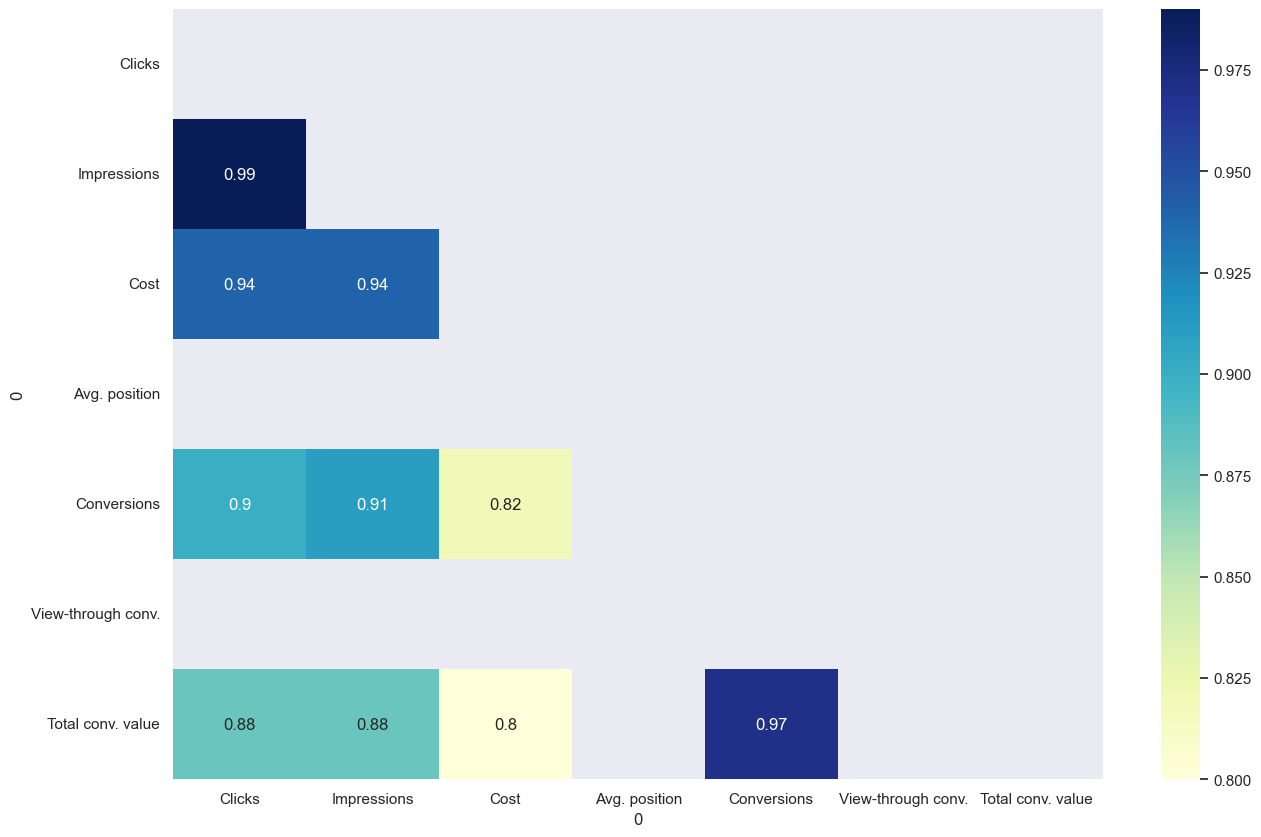

In [12]:
final_heatmap(Campaign_1_August.iloc[:,3:-1])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


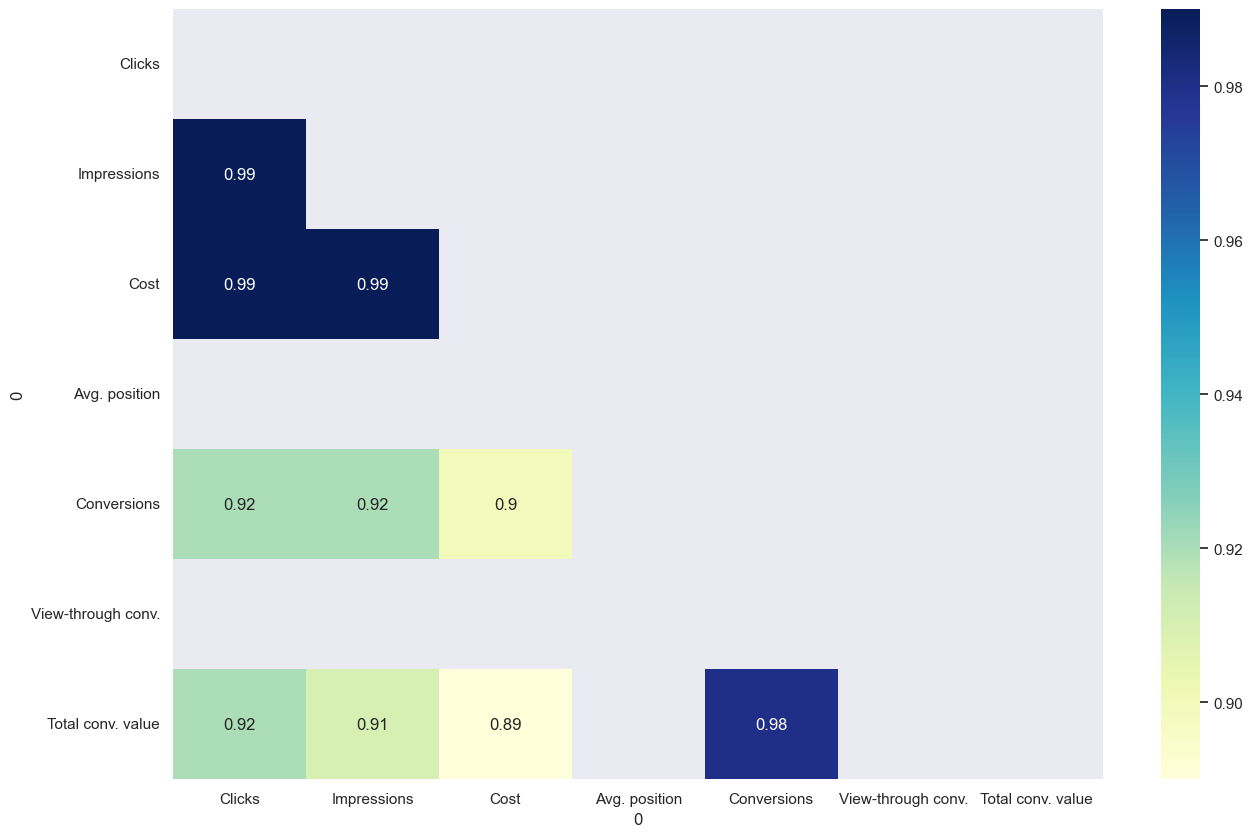

In [13]:
final_heatmap(Campaign_1_September.iloc[:,3:-1])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


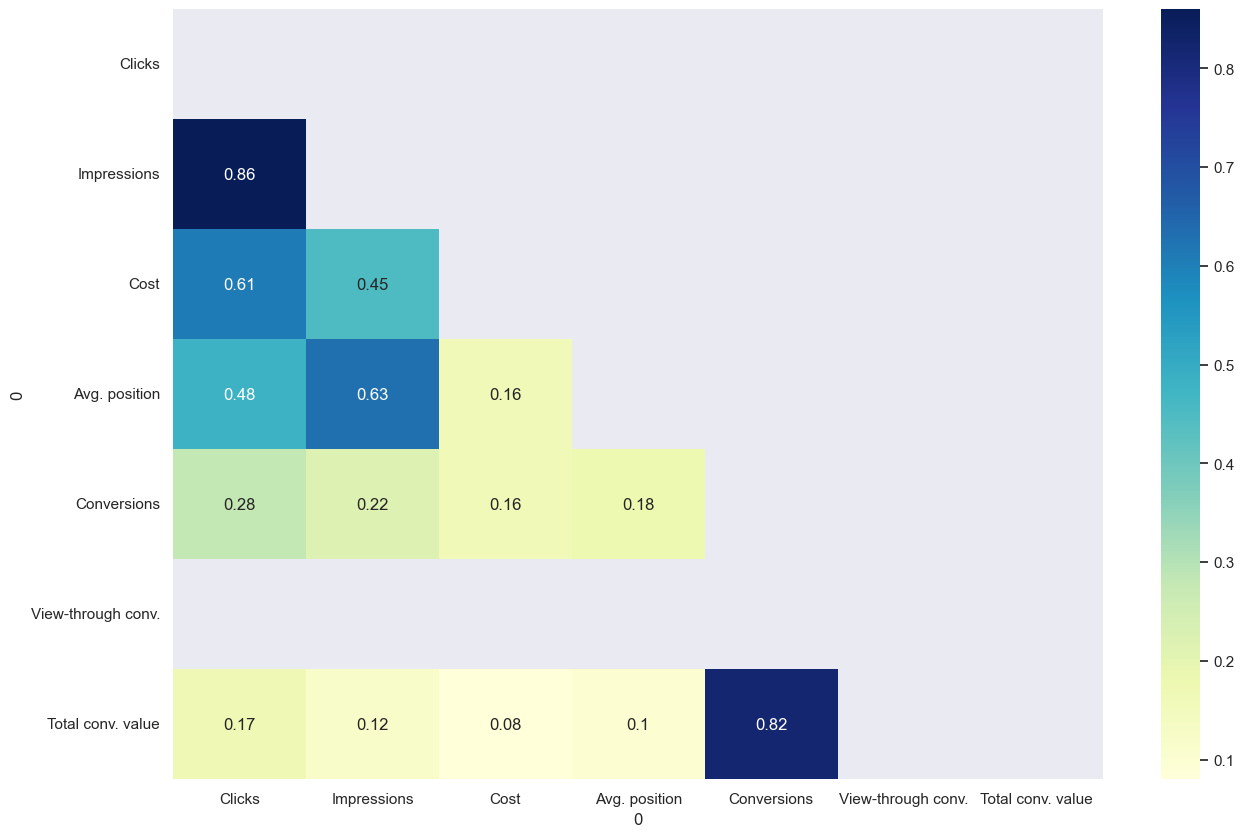

In [14]:
final_heatmap(Campaign_3_August.iloc[:,3:-1])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


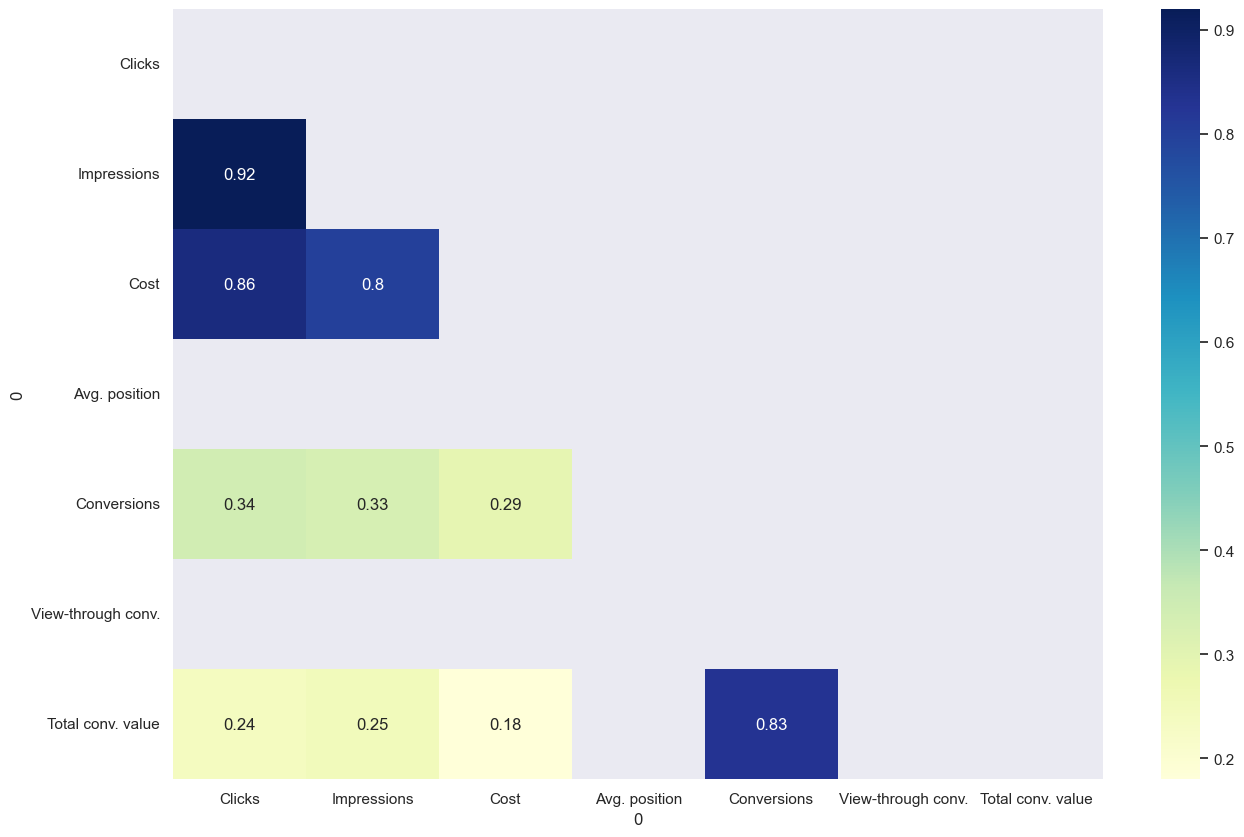

In [15]:
final_heatmap(Campaign_3_September.iloc[:,3:-1])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


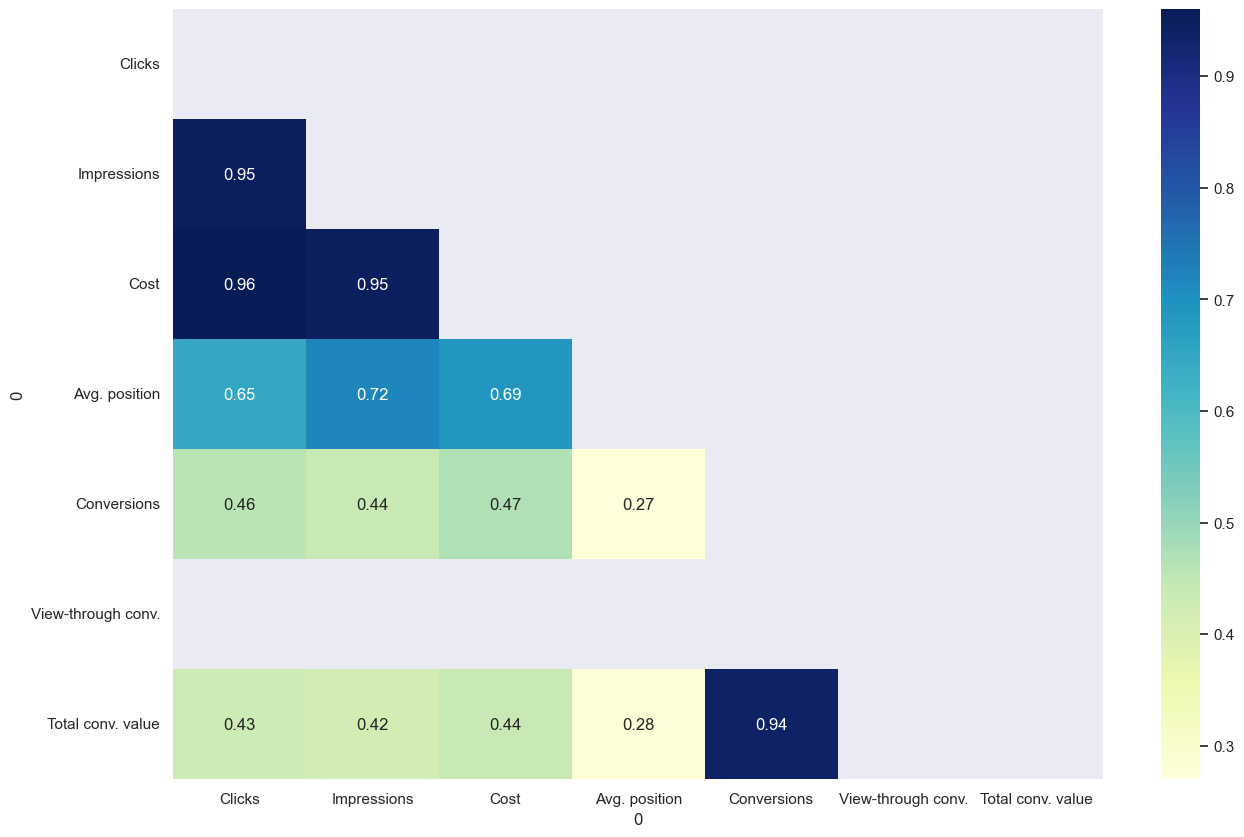

In [16]:
final_heatmap(Campaign_7_August.iloc[:,3:-1])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


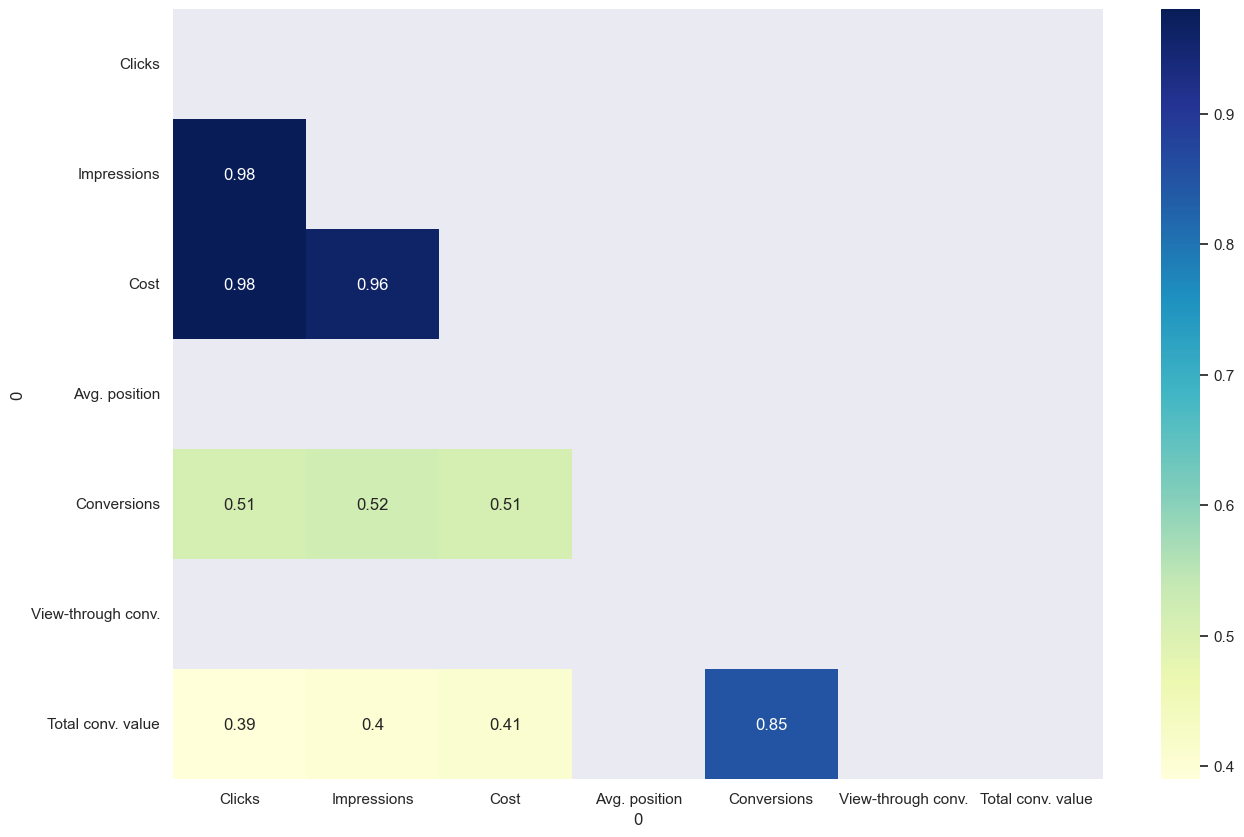

In [17]:
final_heatmap(Campaign_7_September.iloc[:,3:-1])

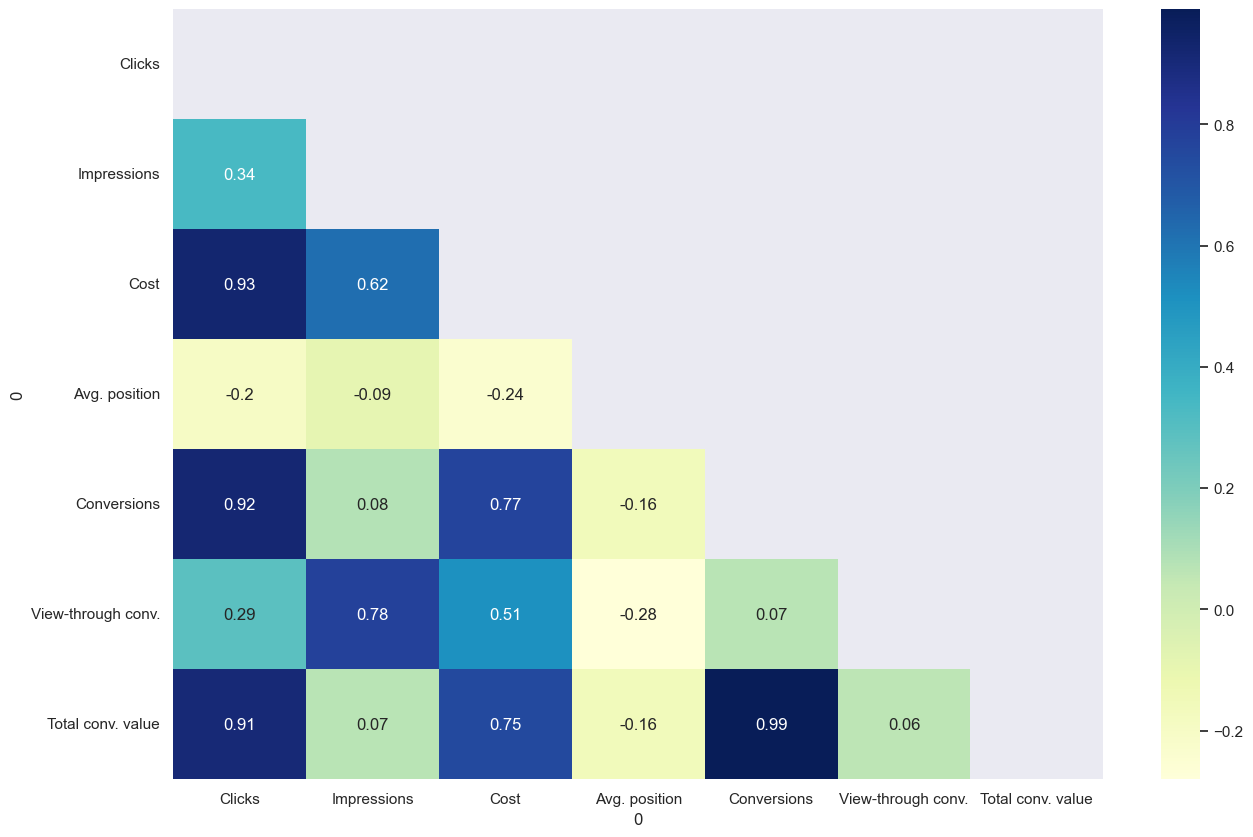

In [18]:
final_heatmap(Campaign_15_August.iloc[:,3:-1])

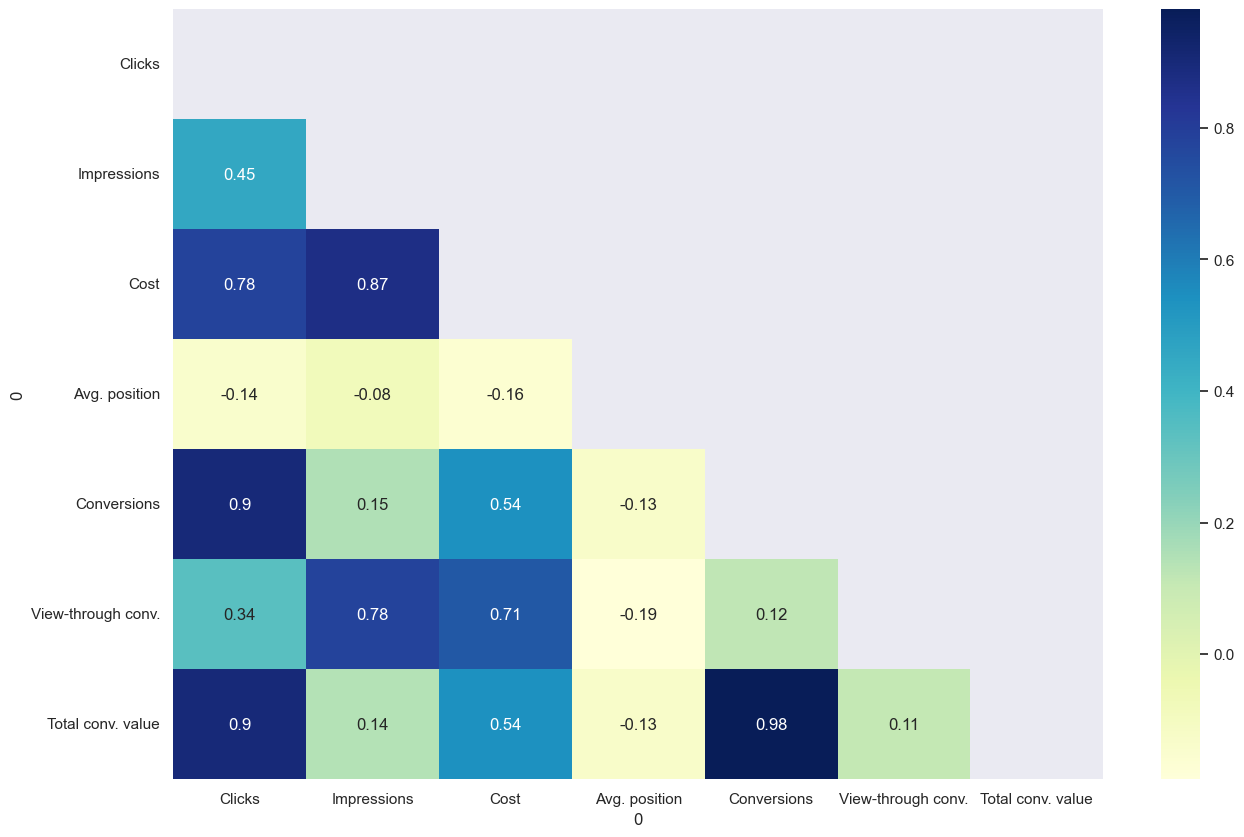

In [19]:
final_heatmap(Campaign_15_September.iloc[:,3:-1])

### Function to group ads and plot bar chart

In [20]:
def add_group_ads(df):
    new_df = pd.DataFrame
    new_df = df.groupby(['AdGroup']).sum()
    new_df["CTR"] = new_df['Clicks'] / new_df['Impressions']
    new_df["Cost_per_Conversion"] = new_df['Cost'] / new_df['Conversions']
    new_df["Conversion_rates"] = new_df['Conversions'] / new_df['Clicks']
    new_df["Avg_CPC"] = new_df['Cost'] / new_df['Clicks']
    new_df['Avg. position'] = new_df['Avg. position'] / new_df['Counter']
    new_df["cost_per_conversion_value"] = new_df['Cost'] / new_df['Total conv. value']
    new_df.replace([np.inf, -np.inf], 0, inplace=True)
    return new_df

In [21]:
def bar_plot(df, row, col, title, xlabel, y=12, x=8):
    add_group_ads(df).loc[row, col].plot(kind="bar", figsize=(y, x))       
    plt.xticks(rotation=30, horizontalalignment="center")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Values")    
    return 

## Method to find importand adgroups

Text(0, 0.5, 'Values')

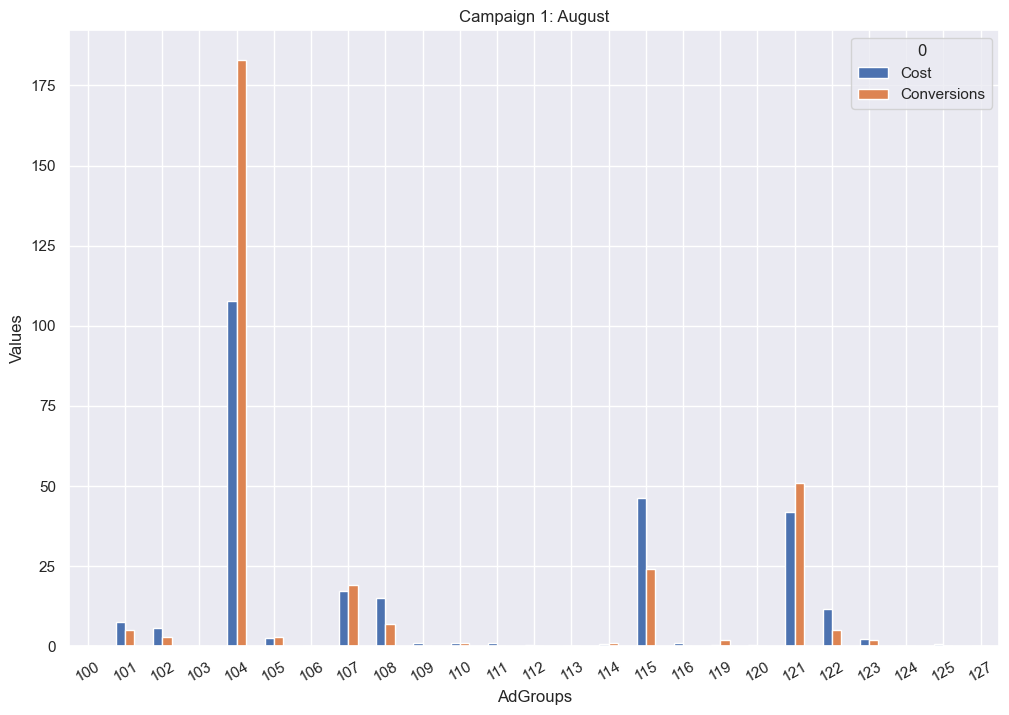

In [22]:
clicks_conv_value = ["Clicks", "Total conv. value"]
cost_conv = ["Cost", "Conversions"]

add_group_ads(Campaign_1_August).loc[:, clicks_conv_value].plot(kind="bar", figsize=(12, 8))
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Campaign 1: August")
plt.xlabel("AdGroups")
plt.ylabel("Values")

# Ploting important adgroups 

## Campaign 1 August

In [23]:
adgroups_1 = ["104", "107", "108", "115", "121", "122"]

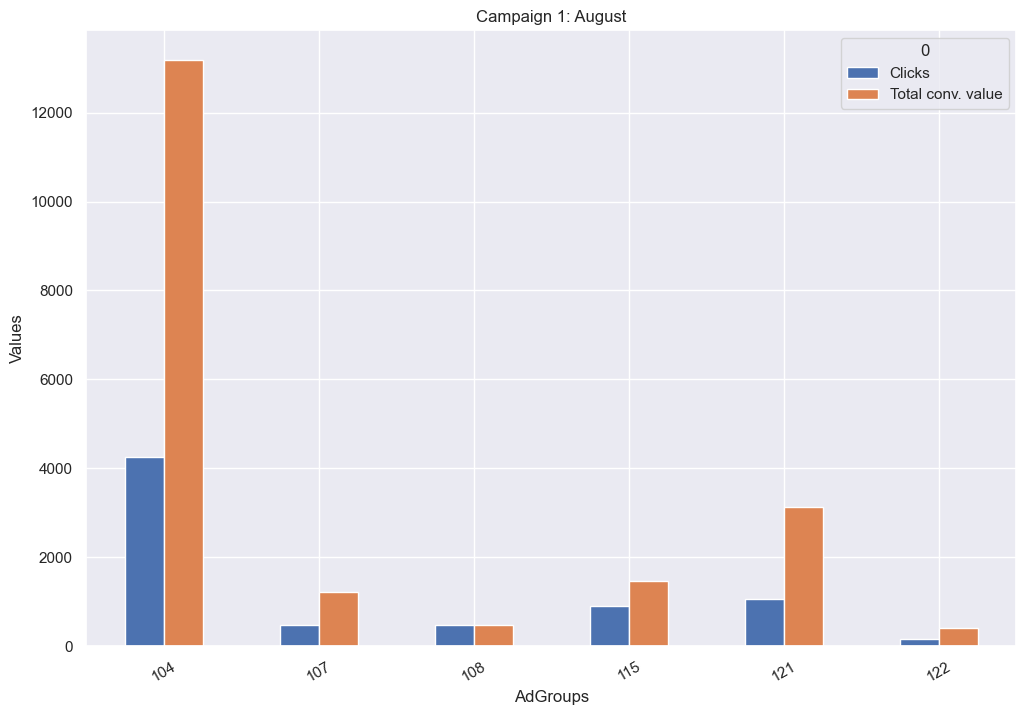

In [24]:
bar_plot(Campaign_1_August, adgroups_1, clicks_conv_value, "Campaign 1: August", "AdGroups")

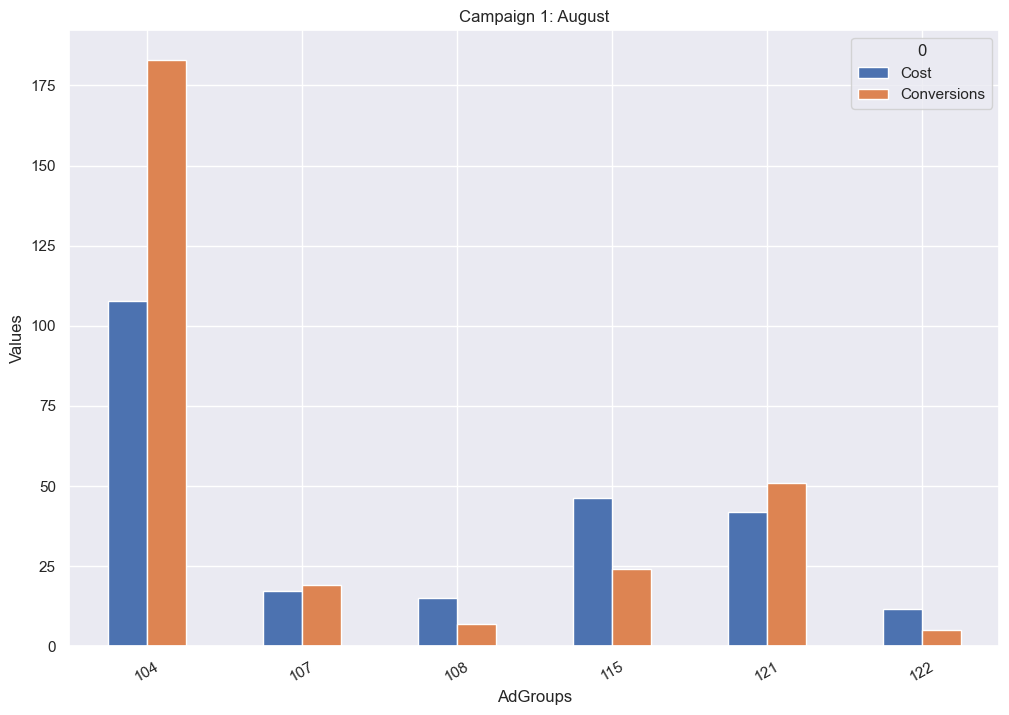

In [25]:
bar_plot(Campaign_1_August, adgroups_1, cost_conv, "Campaign 1: August", "AdGroups")

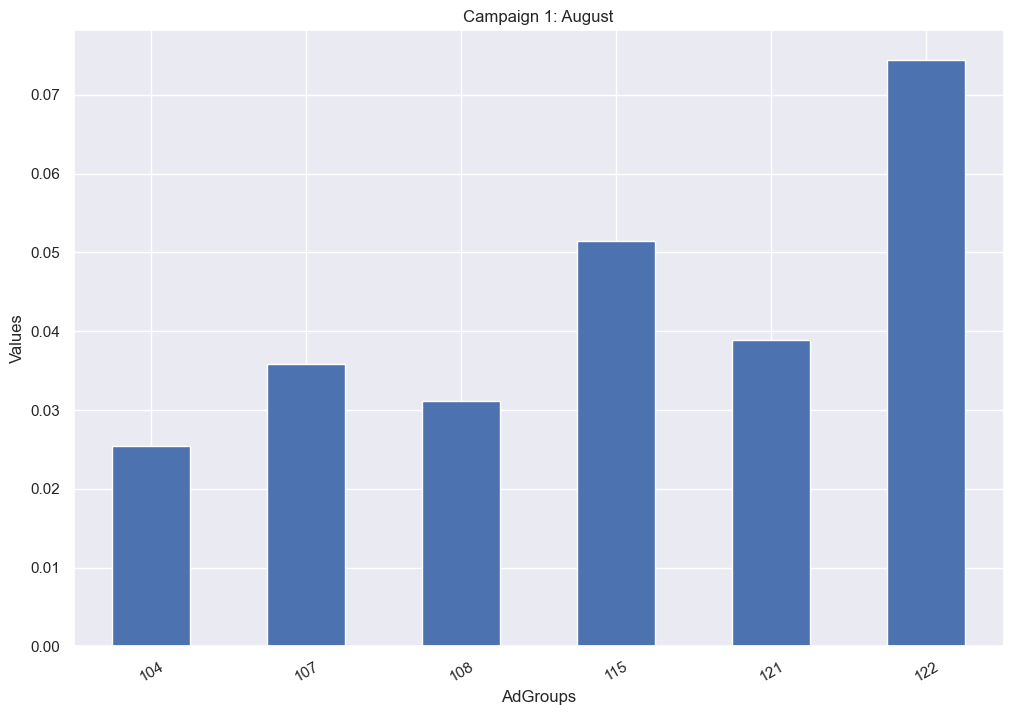

In [26]:
bar_plot(Campaign_1_August, adgroups_1, "Avg_CPC", "Campaign 1: August", "AdGroups")

## Campaign 1 September

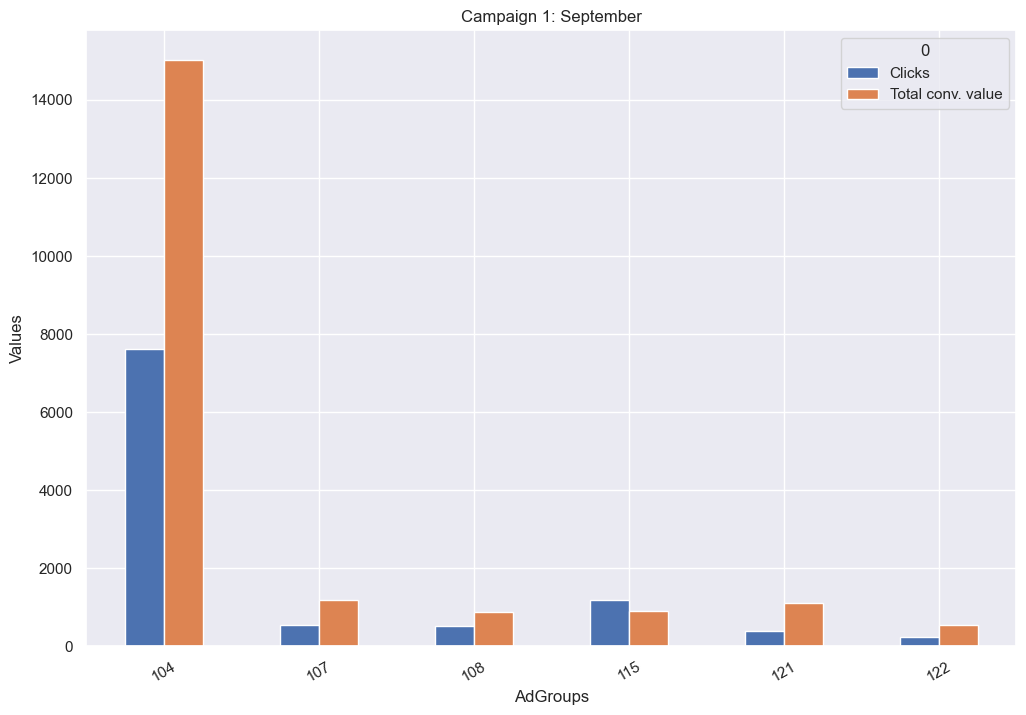

In [27]:
bar_plot(Campaign_1_September, adgroups_1, clicks_conv_value, "Campaign 1: September", "AdGroups")

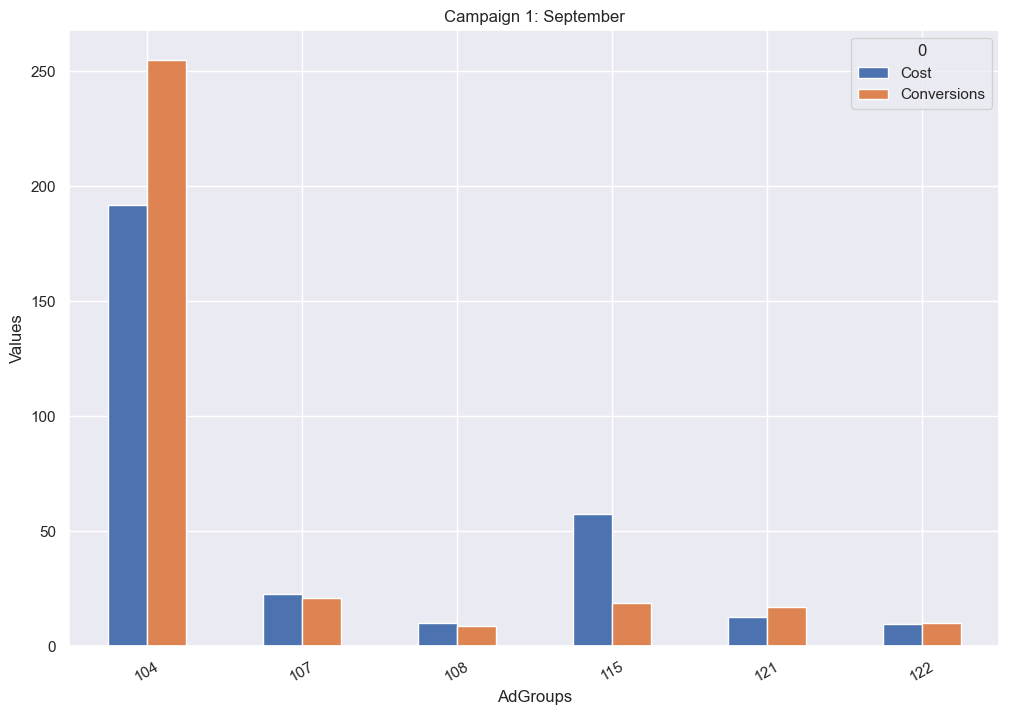

In [28]:
bar_plot(Campaign_1_September, adgroups_1, cost_conv, "Campaign 1: September", "AdGroups")

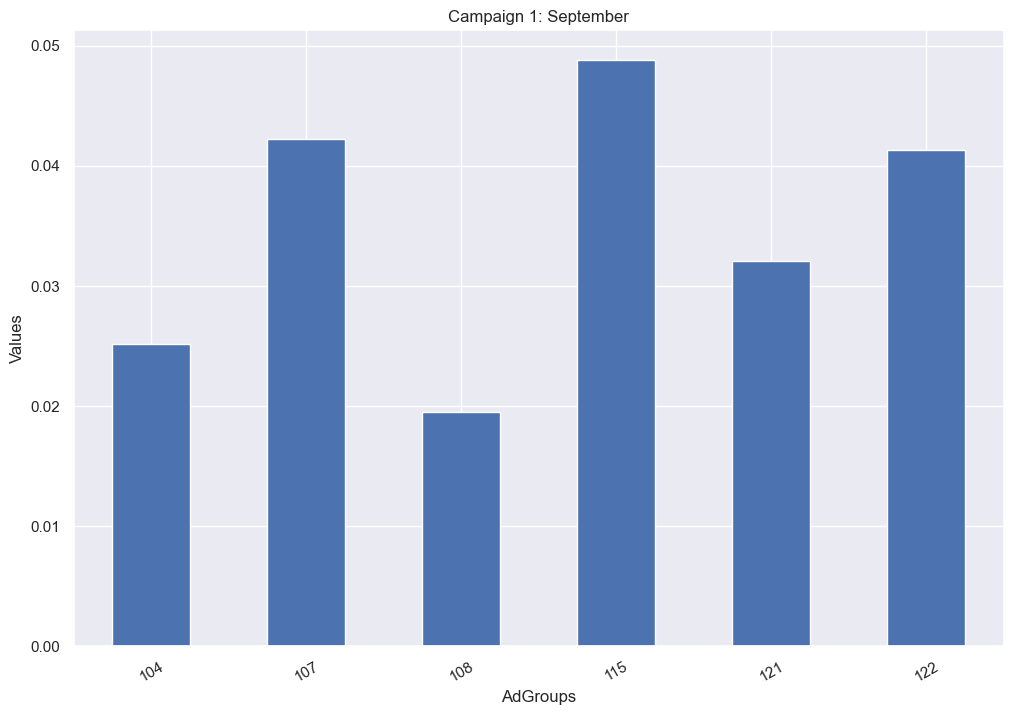

In [29]:
bar_plot(Campaign_1_September, adgroups_1, "Avg_CPC", "Campaign 1: September", "AdGroups")

## Campaign 3 August

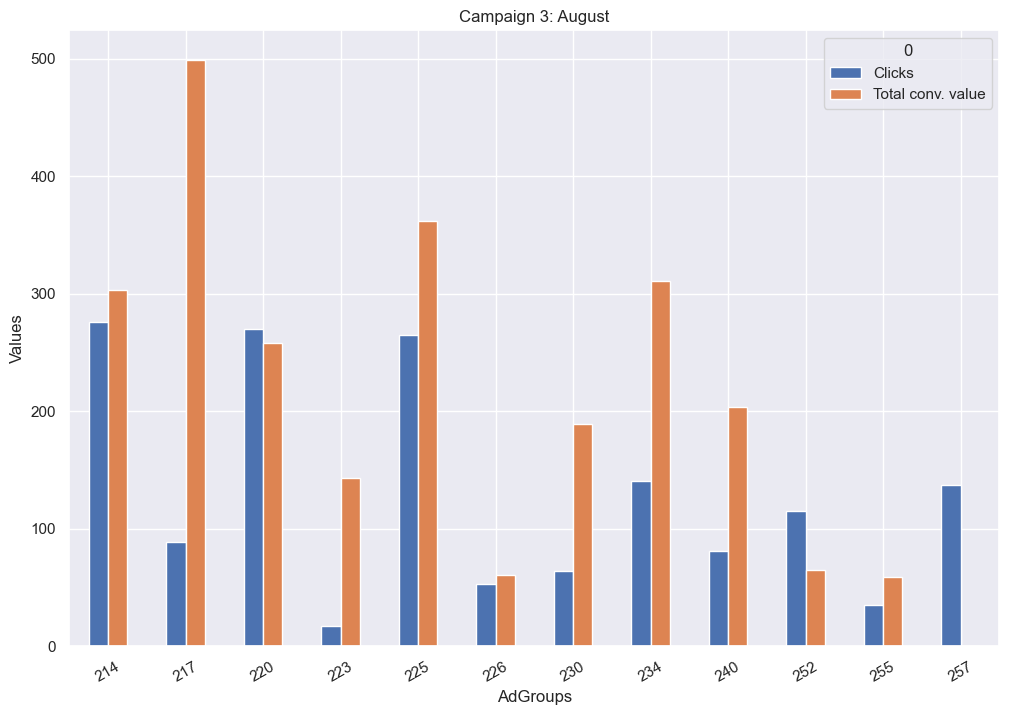

In [30]:
adgroups_3 = ["214", "217", "220", "223", "225", "226", "230","234","240","252","255", "257"]

bar_plot(Campaign_3_August, adgroups_3, clicks_conv_value, "Campaign 3: August", "AdGroups")

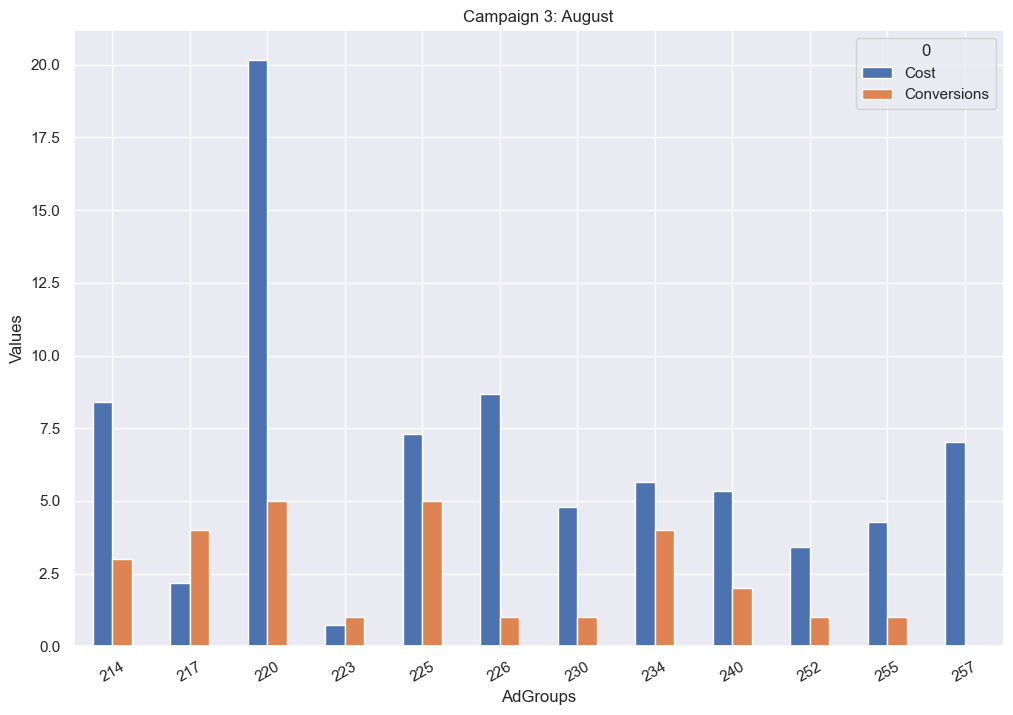

In [31]:
bar_plot(Campaign_3_August, adgroups_3, cost_conv, "Campaign 3: August", "AdGroups")

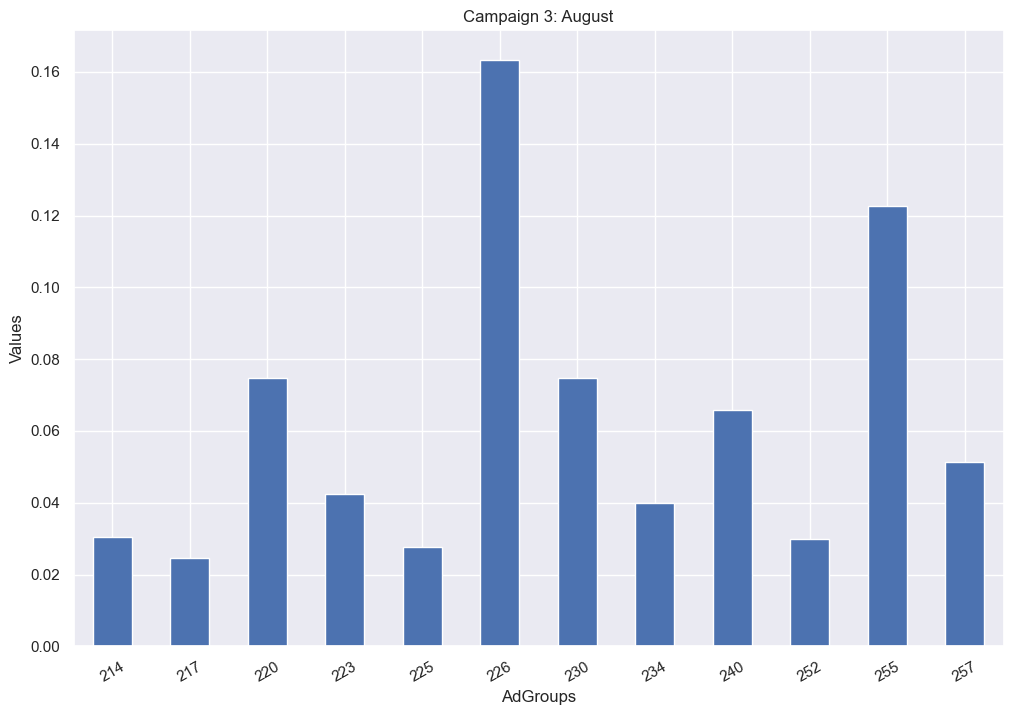

In [32]:
bar_plot(Campaign_3_August, adgroups_3, "Avg_CPC", "Campaign 3: August", "AdGroups")

## Campaign 3 September

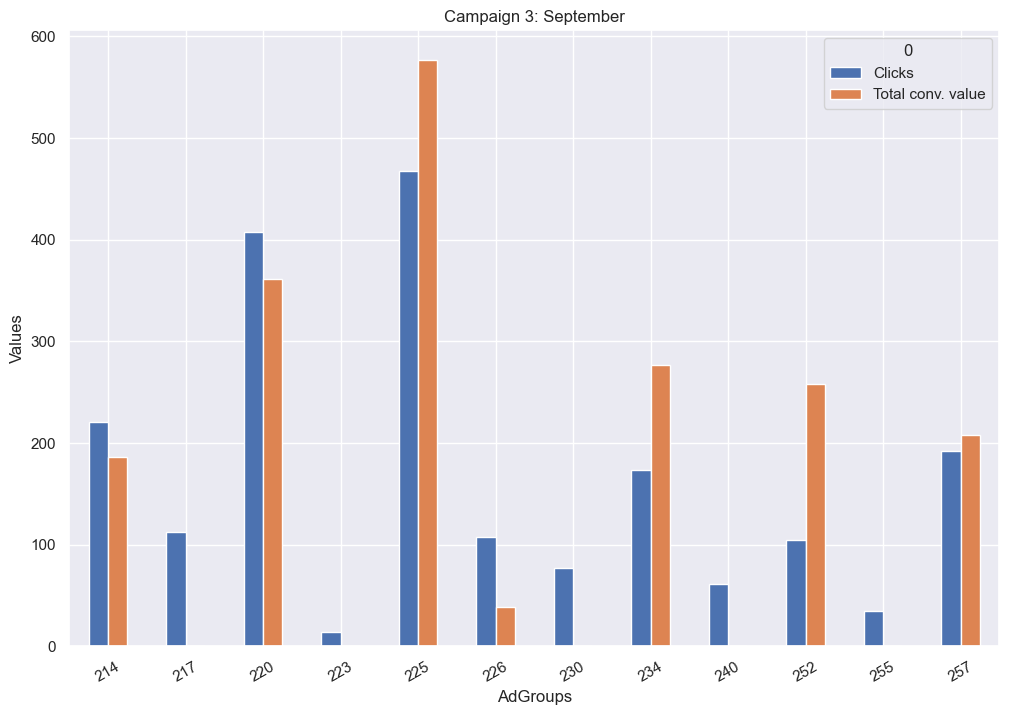

In [33]:
bar_plot(Campaign_3_September, adgroups_3, clicks_conv_value, "Campaign 3: September", "AdGroups")

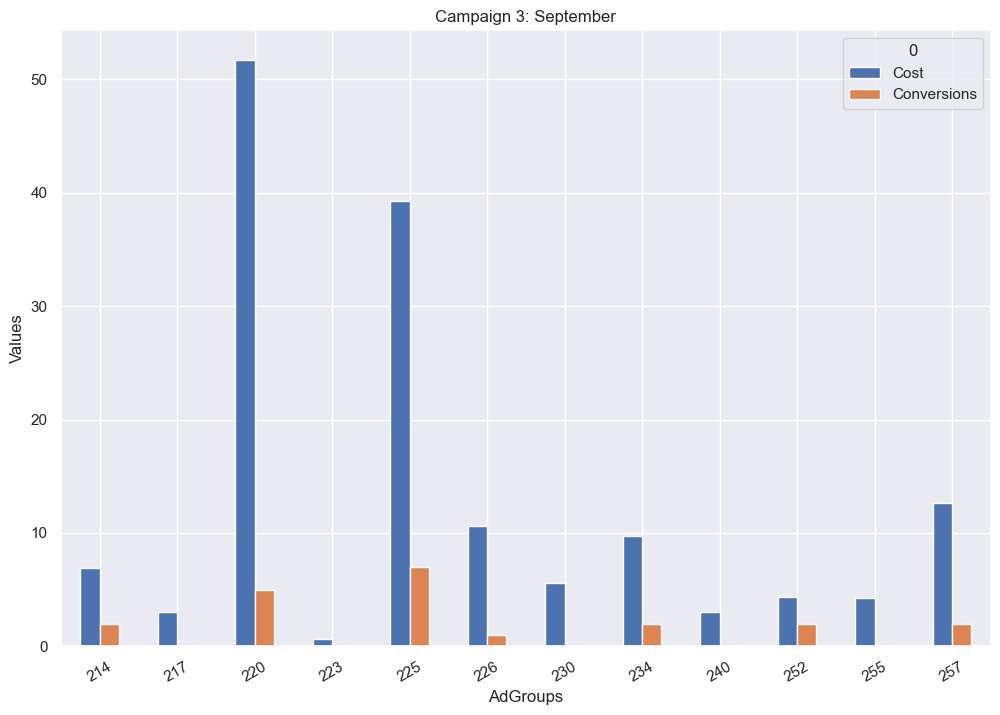

In [34]:
bar_plot(Campaign_3_September, adgroups_3, cost_conv, "Campaign 3: September", "AdGroups")

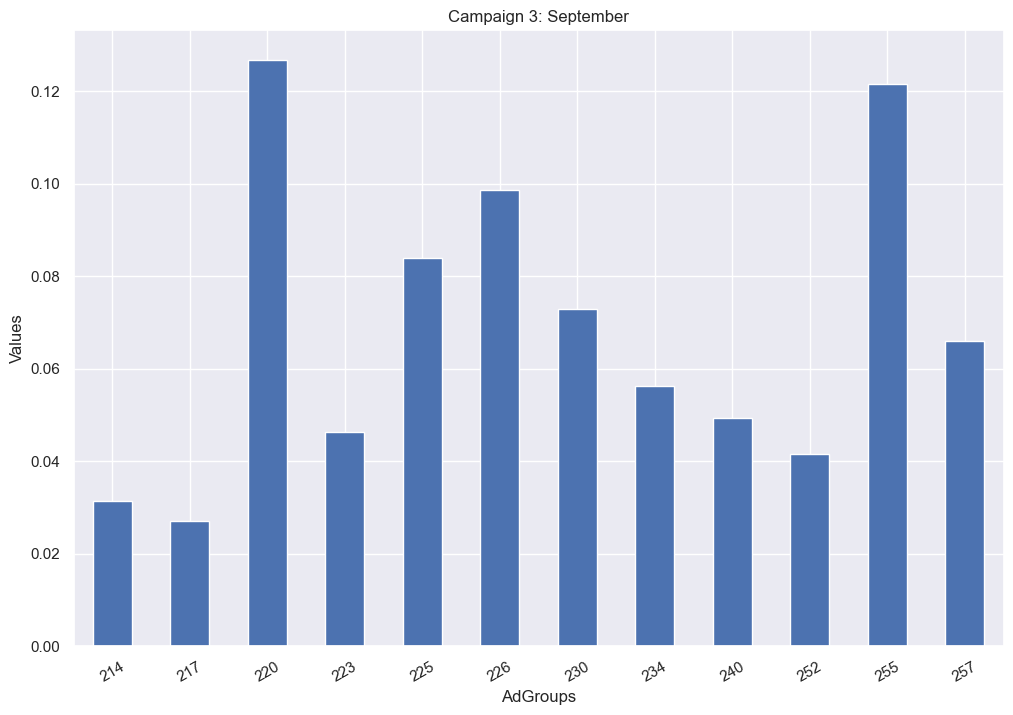

In [35]:
bar_plot(Campaign_3_September, adgroups_3, "Avg_CPC", "Campaign 3: September", "AdGroups")

## Campaign 7 August

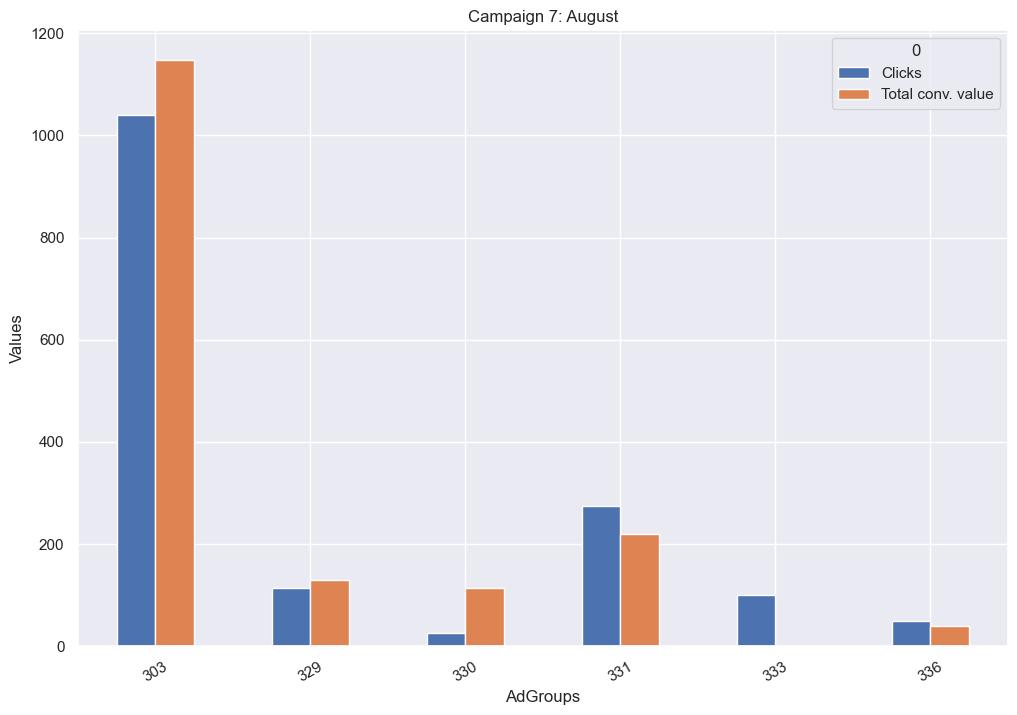

In [36]:
adgroups_7 = ["303", "329", "330", "331", "333", "336"]
bar_plot(Campaign_7_August, adgroups_7, clicks_conv_value, "Campaign 7: August", "AdGroups")

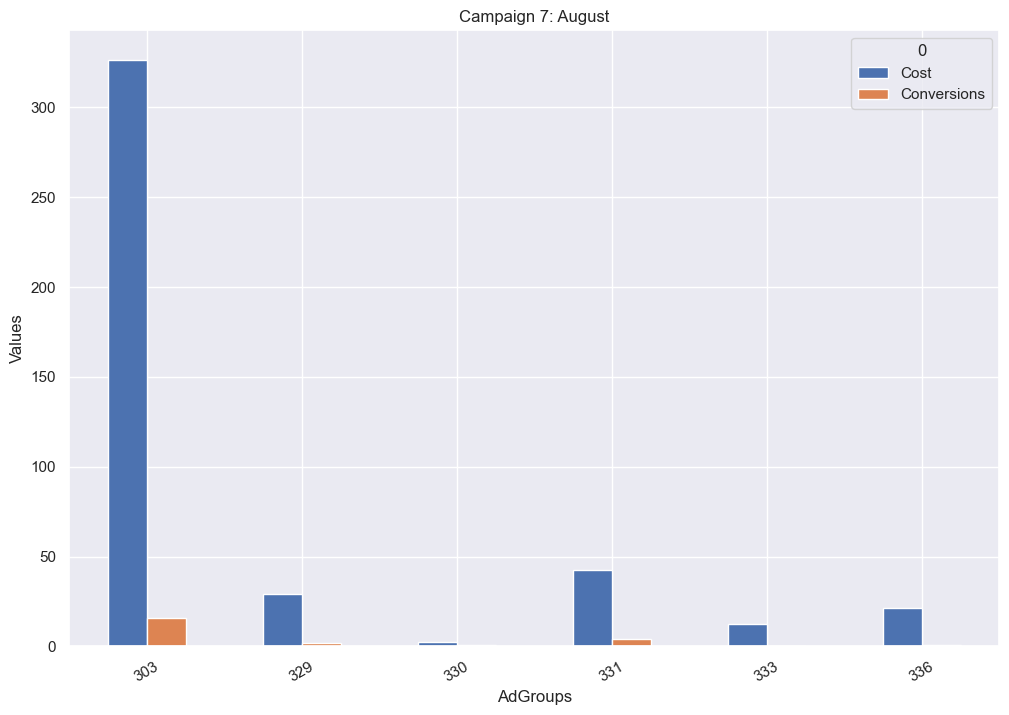

In [37]:
bar_plot(Campaign_7_August, adgroups_7, cost_conv, "Campaign 7: August", "AdGroups")

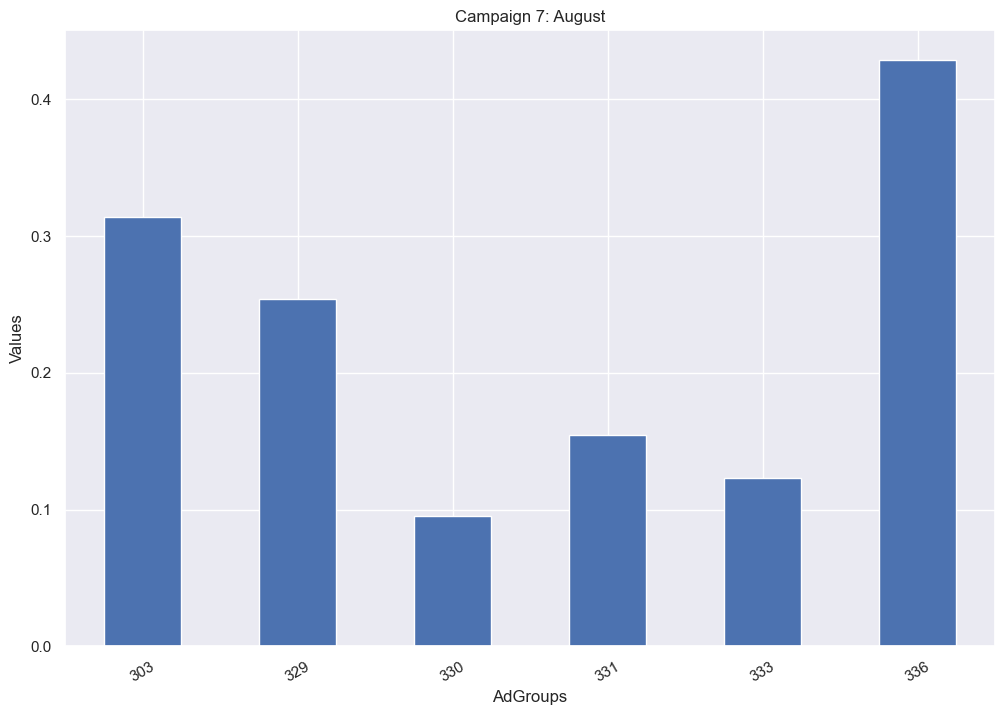

In [38]:
bar_plot(Campaign_7_August, adgroups_7, "Avg_CPC", "Campaign 7: August", "AdGroups")

## Campaign 7 September

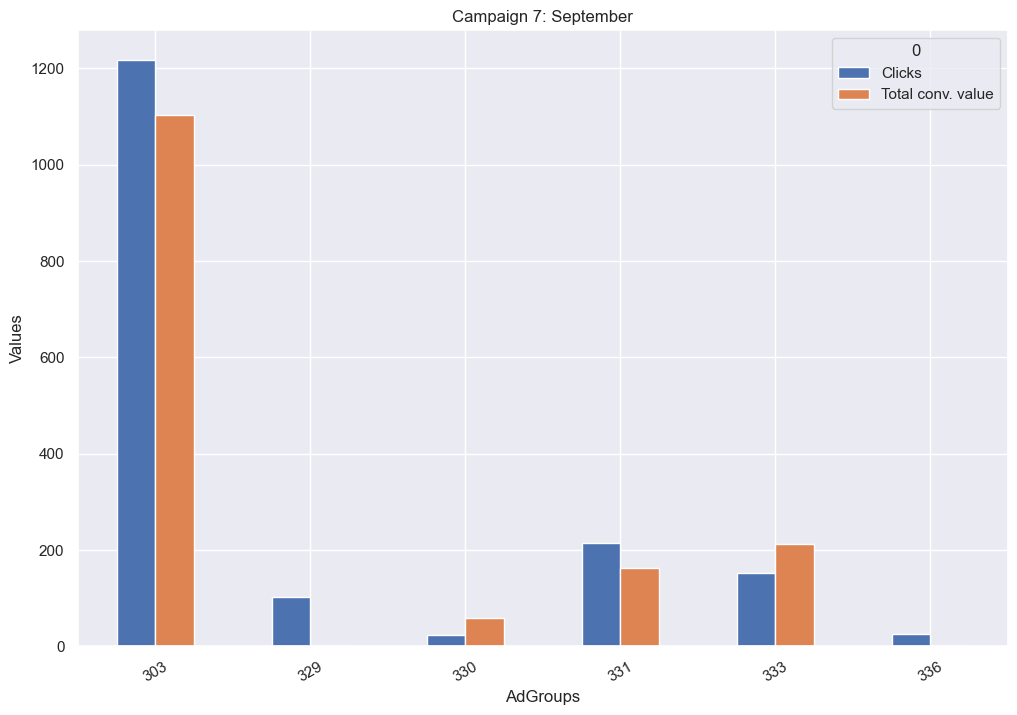

In [39]:
bar_plot(Campaign_7_September, adgroups_7, clicks_conv_value, "Campaign 7: September", "AdGroups")

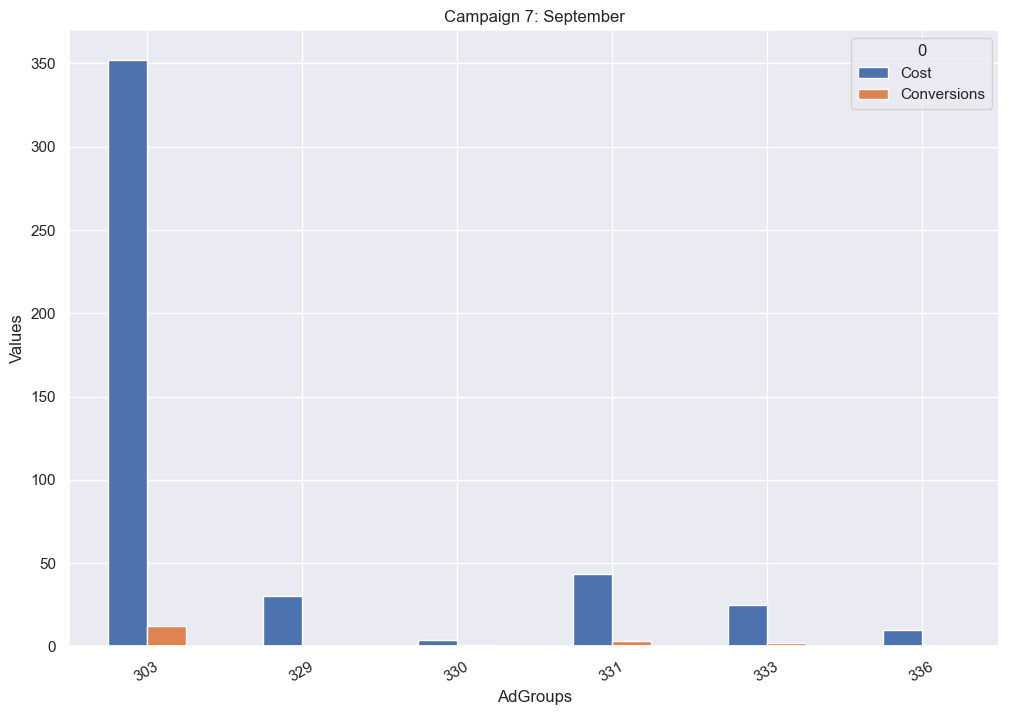

In [40]:
bar_plot(Campaign_7_September, adgroups_7, cost_conv, "Campaign 7: September", "AdGroups")

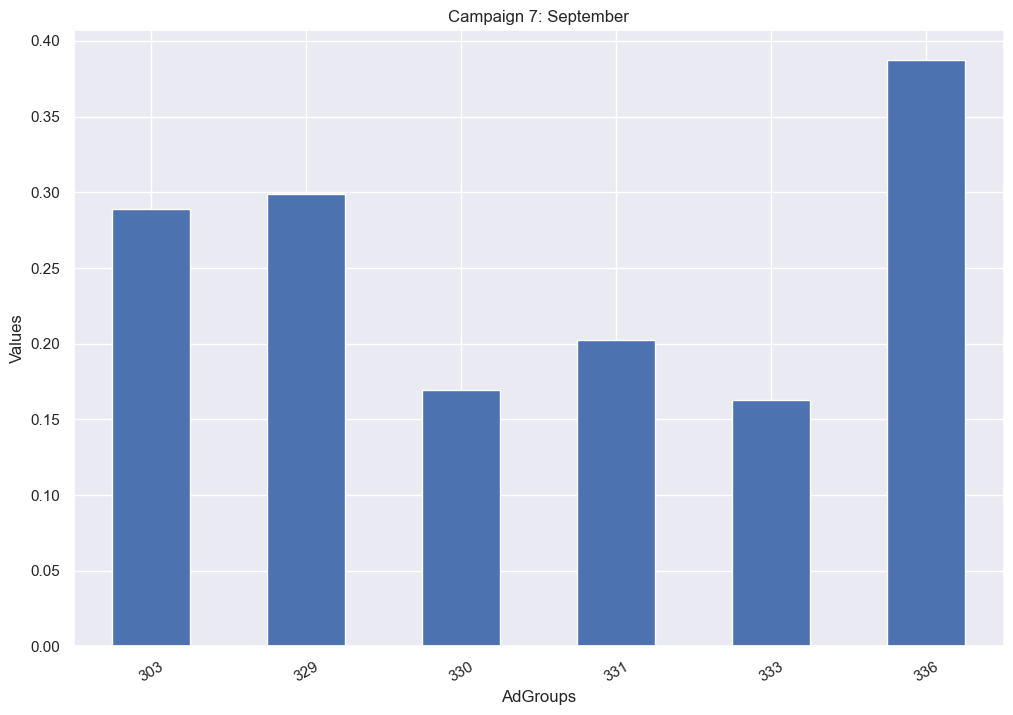

In [41]:
bar_plot(Campaign_7_September, adgroups_7, "Avg_CPC", "Campaign 7: September", "AdGroups")

## Campaign 15 August

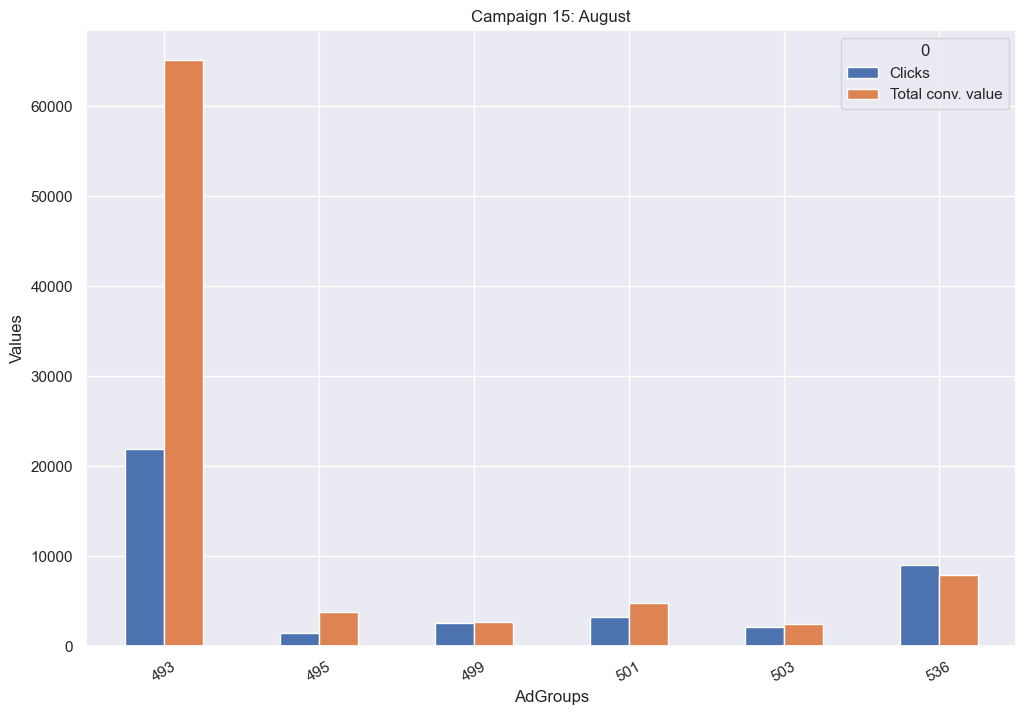

In [42]:
adgroups_15 = ["493", "495", "499", "501", "503", "536"]
bar_plot(Campaign_15_August, adgroups_15, clicks_conv_value, "Campaign 15: August", "AdGroups")

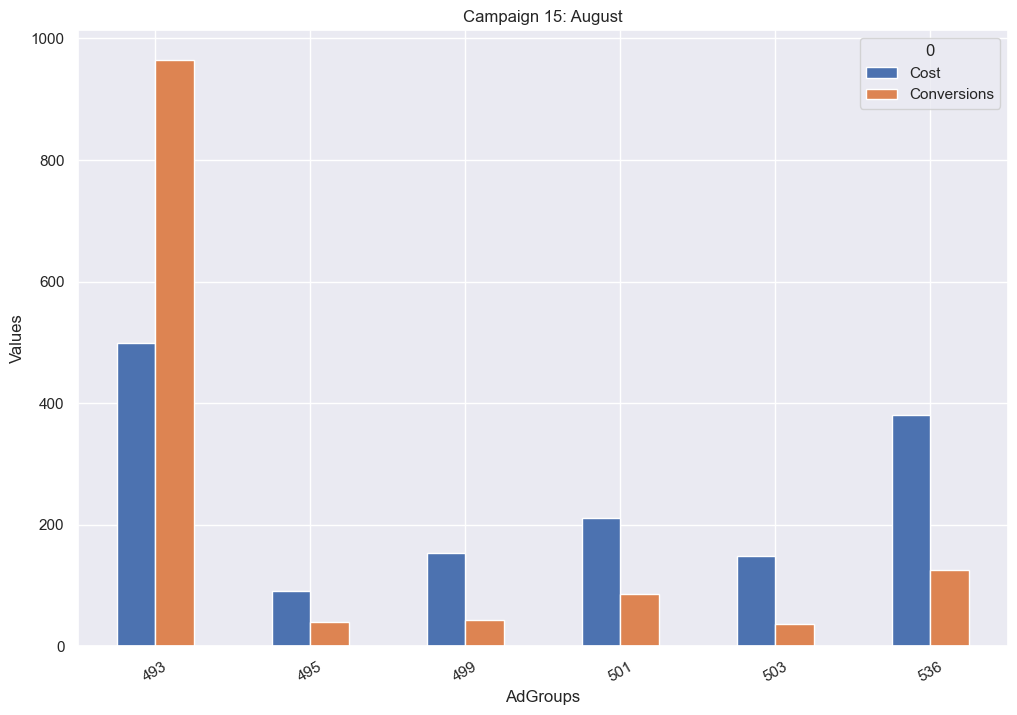

In [43]:
bar_plot(Campaign_15_August, adgroups_15, cost_conv, "Campaign 15: August", "AdGroups")

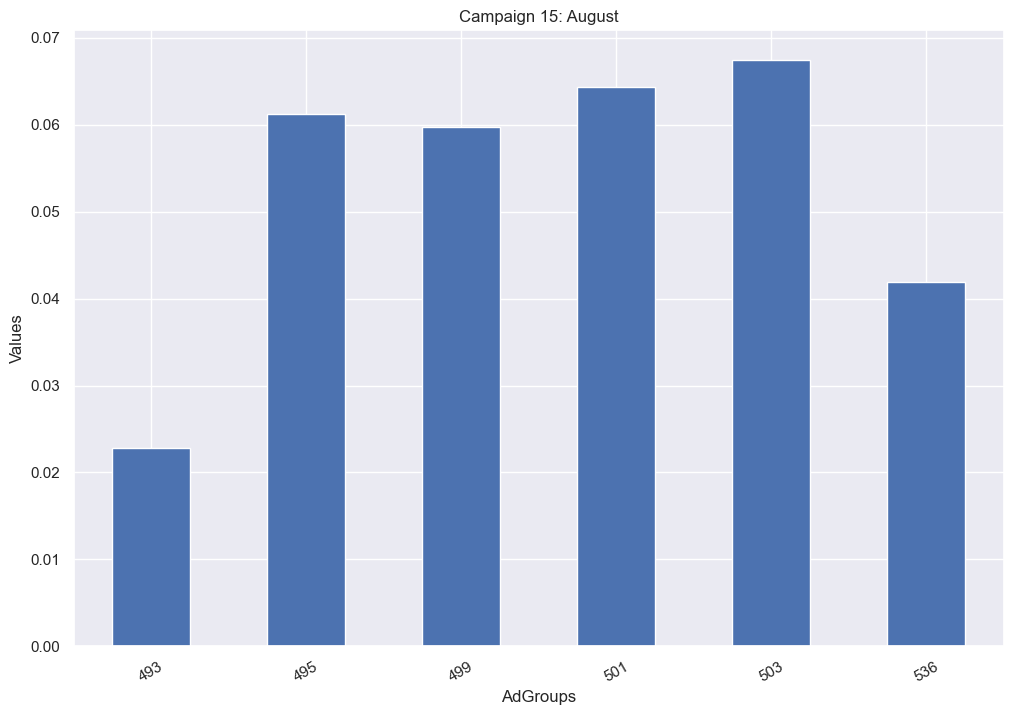

In [44]:
bar_plot(Campaign_15_August, adgroups_15, "Avg_CPC", "Campaign 15: August", "AdGroups")

## Campaign 15 September

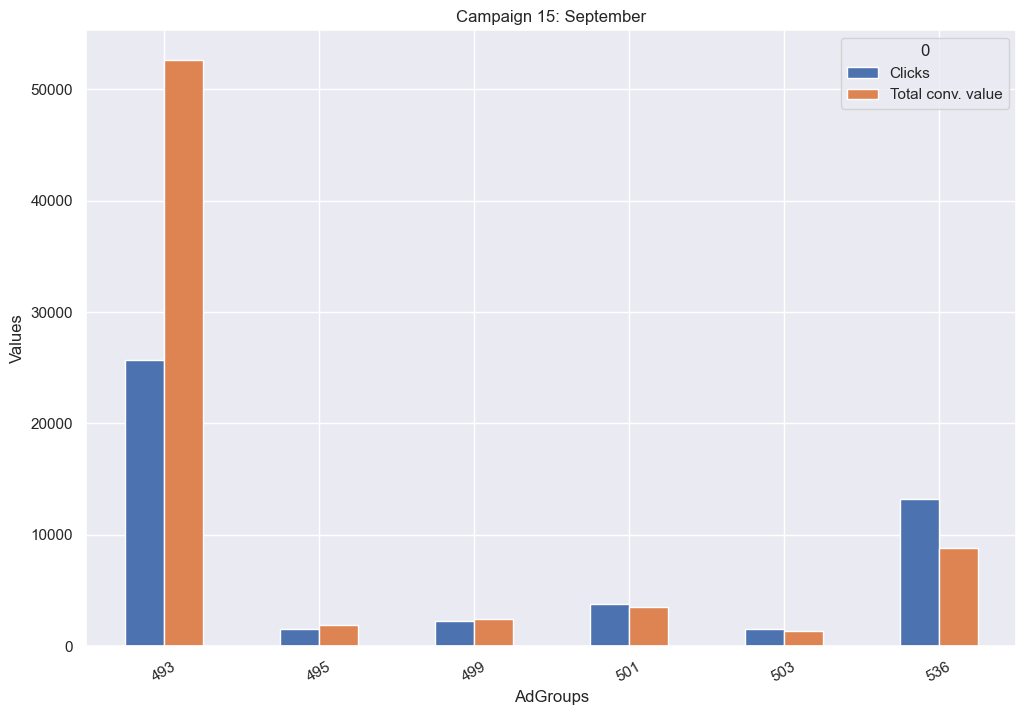

In [45]:
bar_plot(Campaign_15_September, adgroups_15, clicks_conv_value, "Campaign 15: September", "AdGroups")

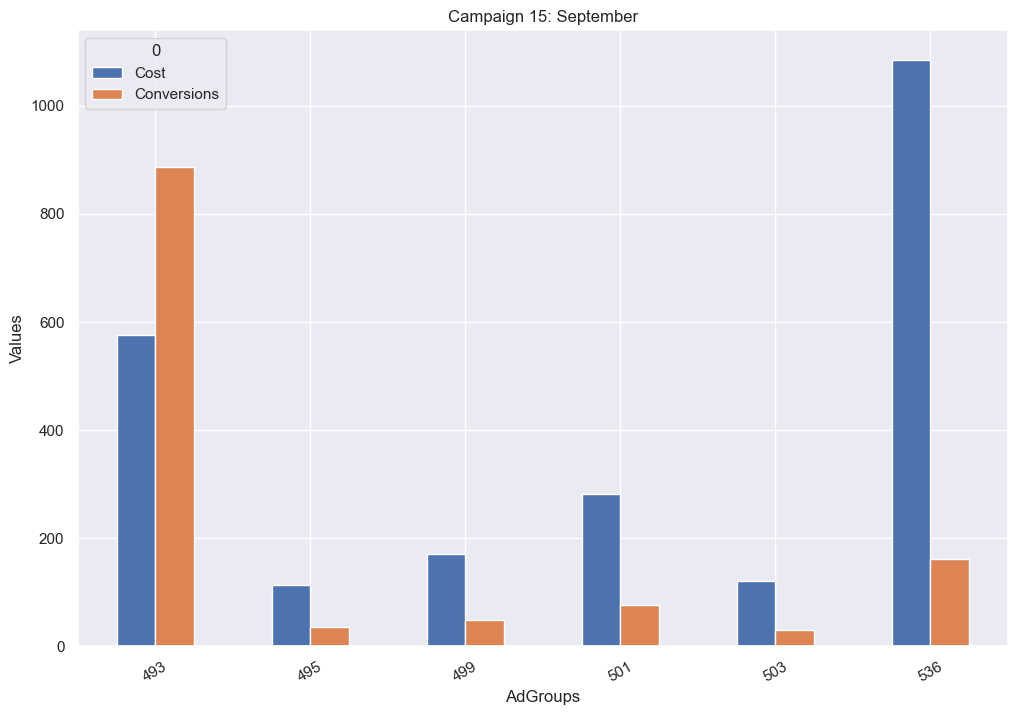

In [46]:
bar_plot(Campaign_15_September, adgroups_15, cost_conv, "Campaign 15: September", "AdGroups")

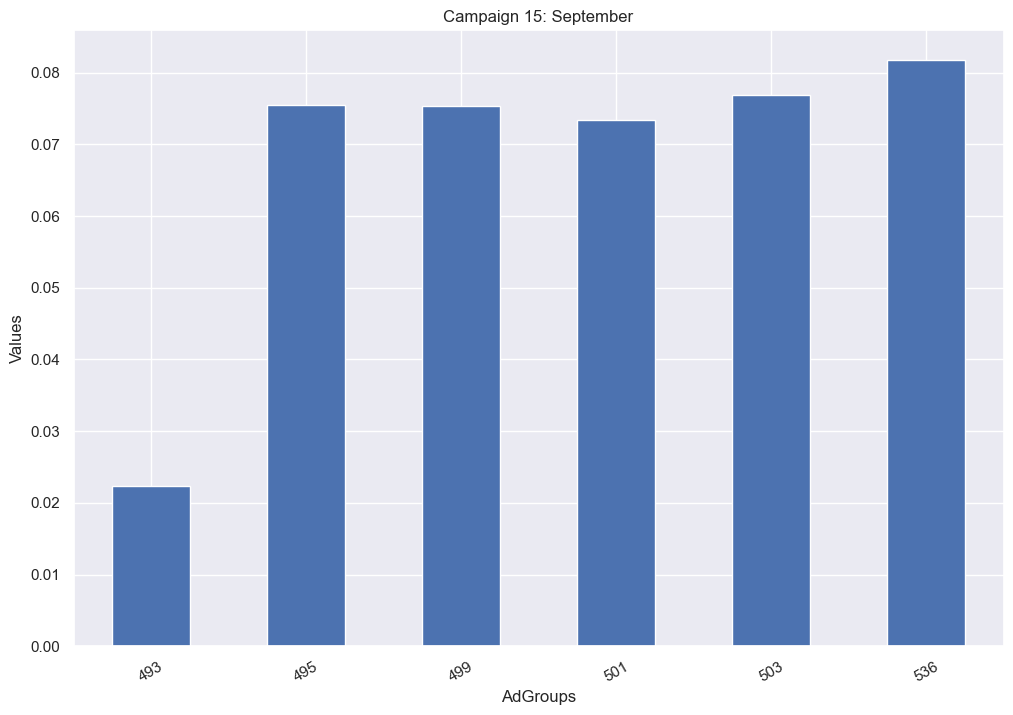

In [47]:
bar_plot(Campaign_15_September, adgroups_15, "Avg_CPC", "Campaign 15: September", "AdGroups")